# Account Creation

Looking into if there are large batches of accounts being created at the same time

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates

In [2]:
users1 = pd.read_csv("../data/users1.csv")
users2 = pd.read_csv("../data/users2.csv")
users3 = pd.read_csv("../data/users3.csv")

In [17]:
users = pd.concat([users1, users2, users3])
users.head()

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
0,uGlAuK3VrvANhAQAiFOJm1nbrXmFTwtmNRNE1g9Yd6k=,uGlAuK3VrvANhAQAiFOJm1nbrXmFTwtmNRNE1g9Yd6k=,uGlAuK3VrvANhAQAiFOJm1nbrXmFTwtmNRNE1g9Yd6k=,中华人民共和国,🥳,NaN,1,15,2019-01-12,zh-cn
1,+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,NaN,NaN,NaN,21,70,2017-09-27,zh-cn
2,NNPBUwRmLGV+945vErmcyGIc2rCjh+GBdLJWeccGpIo=,NNPBUwRmLGV+945vErmcyGIc2rCjh+GBdLJWeccGpIo=,NNPBUwRmLGV+945vErmcyGIc2rCjh+GBdLJWeccGpIo=,NaN,NaN,NaN,0,9,2017-08-30,zh-cn
3,kdrlgclBJnrkyaVcGHEnDL9R3xIjEWYf8CzaOrpOOjc=,kdrlgclBJnrkyaVcGHEnDL9R3xIjEWYf8CzaOrpOOjc=,kdrlgclBJnrkyaVcGHEnDL9R3xIjEWYf8CzaOrpOOjc=,NaN,NaN,NaN,1,62,2017-08-30,zh-cn
4,14sKta+ATygMbCyCTMAF6sGqsR+FfyuwR4HKPzE05K4=,14sKta+ATygMbCyCTMAF6sGqsR+FfyuwR4HKPzE05K4=,14sKta+ATygMbCyCTMAF6sGqsR+FfyuwR4HKPzE05K4=,NaN,NaN,NaN,4,45,2017-08-30,zh-cn


In [18]:
# drop unnecessary columns
users = users.drop(labels=['follower_count', 'following_count', 'user_profile_url', 'user_reported_location'],
                   axis=1)
users.head()

,userid,user_display_name,user_screen_name,user_profile_description,account_creation_date,account_language
0,uGlAuK3VrvANhAQAiFOJm1nbrXmFTwtmNRNE1g9Yd6k=,uGlAuK3VrvANhAQAiFOJm1nbrXmFTwtmNRNE1g9Yd6k=,uGlAuK3VrvANhAQAiFOJm1nbrXmFTwtmNRNE1g9Yd6k=,🥳,2019-01-12,zh-cn
1,+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,NaN,2017-09-27,zh-cn
2,NNPBUwRmLGV+945vErmcyGIc2rCjh+GBdLJWeccGpIo=,NNPBUwRmLGV+945vErmcyGIc2rCjh+GBdLJWeccGpIo=,NNPBUwRmLGV+945vErmcyGIc2rCjh+GBdLJWeccGpIo=,NaN,2017-08-30,zh-cn
3,kdrlgclBJnrkyaVcGHEnDL9R3xIjEWYf8CzaOrpOOjc=,kdrlgclBJnrkyaVcGHEnDL9R3xIjEWYf8CzaOrpOOjc=,kdrlgclBJnrkyaVcGHEnDL9R3xIjEWYf8CzaOrpOOjc=,NaN,2017-08-30,zh-cn
4,14sKta+ATygMbCyCTMAF6sGqsR+FfyuwR4HKPzE05K4=,14sKta+ATygMbCyCTMAF6sGqsR+FfyuwR4HKPzE05K4=,14sKta+ATygMbCyCTMAF6sGqsR+FfyuwR4HKPzE05K4=,NaN,2017-08-30,zh-cn


In [40]:
#convert to datetime, and then date
users_dt = pd.to_datetime(users.account_creation_date).apply(lambda x: x.date())
users.loc[:,'account_creation_date'] = users_dt.values

In [55]:
account_creation_counts = users.groupby('account_creation_date').count().reset_index()[['account_creation_date', 'userid']]
account_creation_counts.shape

(1359, 2)

In [67]:
dates = matplotlib.dates.date2num(account_creation_counts.account_creation_date)
account_counts = account_creation_counts.userid.values

In [60]:
account_creation_counts.userid.values

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

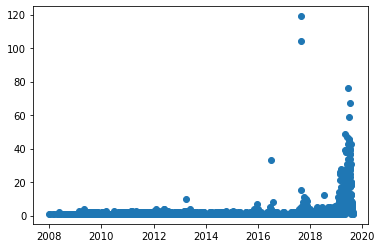

In [68]:
plt.plot_date(dates, account_counts)